In [11]:
import os
import gym
import time
# from balance_gym_v2 import Ascento
import numpy as np
#from drone_gym import Drone
from dynamics.quadsim_2d import QuadSim
import tqdm
# from balance_pend import InvertedPendulumEnv as Ascento


num_traj = 50
num_snaps = 200*3 +1 #1000-> 5sec of data ... (1000/200)
num_states = 6


num_inputs = 2


In [12]:
env = QuadSim()

9.67564724261171


In [13]:
# def gaussian_noise(x, std):
#     noise = np.random.normal(0, std, size = x.shape)
#     x_noisy = x + noise
#     return x_noisy 

In [15]:
X = np.empty((num_traj,num_snaps,num_states)) # cartesian state matrix
X_des = np.empty((num_traj,num_snaps,num_states)) # cartesian state matrix
U = np.empty((num_traj,num_snaps-1,num_inputs)) # input matrix
curr_state = []
# curr_state_noise = []
des_state = []
action_plt = []
for i in tqdm.tqdm(range(num_traj)):
    obs = env.reset()
    done = False
    
    # with open("/home/rajpal/koopman/linear_drone_koopman/Trajectory/traj_{}.csv".format(i+1), "w") as f:
    #     f.write("t,x,y,z,roll,pitch,yaw,vx,vy,vz,roll_rate,pitch_rate,yaw_rate,U,Mx,My,Mz\n")
         # X[i,0,:] = env.Quadrotor.get_state()
#         print(X[i,0,0],X[i,0,1],X[i,0,2],X[i,0,3],X[i,0,4],X[i,0,5],X[i,0,6],X[i,0,7],X[i,0,8],X[i,0,9],X[i,0,10],X[i,0,11])
        # f.write("{},{},{},{},{},{},{},{},{},{},{},{},{}\n".format(env.t, X[i,0,0], X[i,0,1], X[i,0,2], X[i,0,3], X[i,0,4], X[i,0,5], X[i,0,6], X[i,0,7], X[i,0,8], X[i,0,9], X[i,0,10], X[i,0,11]))

    for j in range(num_snaps):
        #env.render()\n",
        action = env.action_space.sample()
        #action, _states = model.predict(obs)
#             U[i,j,:] = action[0], action[1]
        obs, reward, done, info = env.step(action)
        state = env.Quadrotor.get_state()
        des_state = env.get_des_state()
        curr_state.append(state)
        # curr_state_noise.append(state)
        # des_state.append(env.get_des_state())
        action_plt.append(env.get_action())
        # #print(action)\n",
        # print(env.get_action().reshape(-1))
        if j >0 and j < num_snaps-1:
            U[i,j,:] = env.get_action()#.reshape(-1)
            X[i,j+1,:] = state
            X_des[i,j+1,:] = des_state[:6]
        # f.write("{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{}\n".format(env.t, X[i,j+1,0], X[i,j+1,1], X[i,j+1,2], X[i,j+1,3], X[i,j+1,4], X[i,j+1,5], X[i,j+1,6], X[i,j+1,7], X[i,j+1,8], X[i,j+1,9], X[i,j+1,10], X[i,j+1,11], U[i,j,0], U[i,j,1], U[i,j,2], U[i,j,3]))
        #plot_act.append(f)
        #print(reward)
        #plot_ep.append(episode)\n",
    #print(\"Episode - {} Score - {}\".format(episode, score))\n",

        
env.close()

100%|███████████████████████████████████████████| 50/50 [00:18<00:00,  2.77it/s]


In [5]:
U.shape, X.shape, X_des.shape

((50, 600, 2), (50, 601, 6), (50, 601, 6))

In [6]:
import matplotlib.pyplot as plt
import random
j = random.choice(range(0,50))
j

28

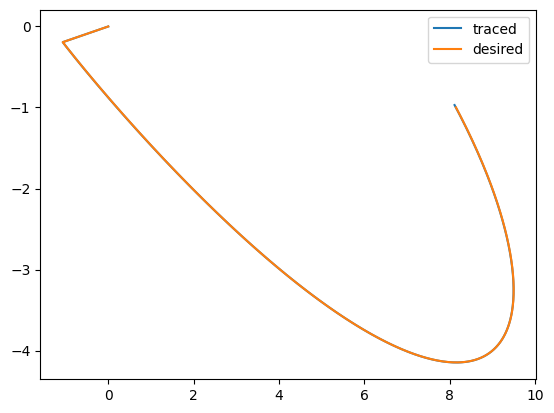

In [7]:
plt.figure()
plt.plot(X[j,:,0],X[j,:,1], label = 'traced')
plt.plot(X_des[j,:,1],X_des[j,:,2], label = 'desired')
plt.legend()

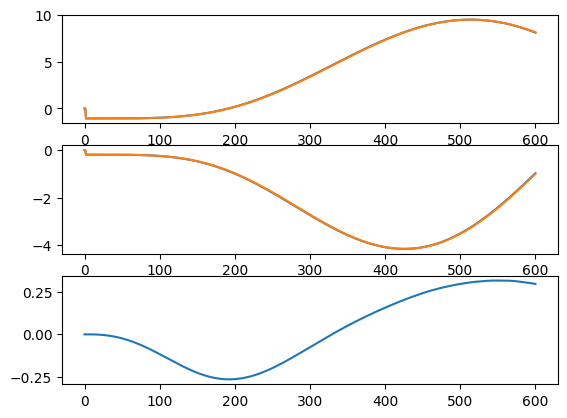

In [8]:
plt.figure()
plt.subplot(3,1,1)
plt.plot(X[j,:,0])
plt.plot(X_des[j,:,1])

plt.subplot(3,1,2)
plt.plot(X[j,:,1])
plt.plot(X_des[j,:,2])

plt.subplot(3,1,3)
plt.plot(X[j,:,2])

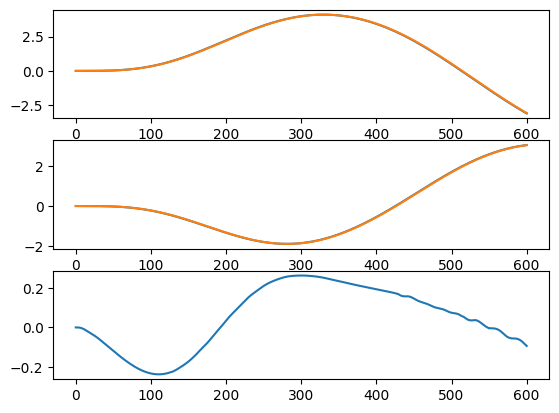

In [9]:
plt.figure()
plt.subplot(3,1,1)
plt.plot(X[j,:,3])
plt.plot(X_des[j,:,4])

plt.subplot(3,1,2)
plt.plot(X[j,:,4])
plt.plot(X_des[j,:,5])

plt.subplot(3,1,3)
plt.plot(X[j,:,5])

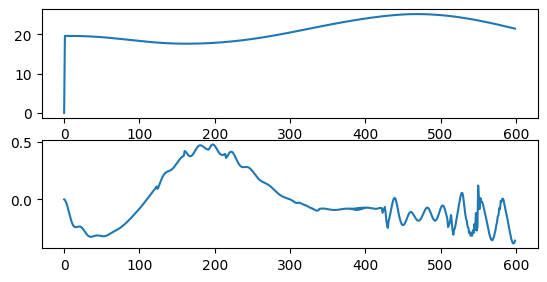

In [10]:
plt.figure()
plt.subplot(3,1,1)
plt.plot(U[j,:,0])

plt.subplot(3,1,2)
plt.plot(U[j,:,1])
